In [61]:
import torch
import warnings

warnings.filterwarnings('ignore')

In [62]:
state_dict = torch.load('checkpoints/state_dict')

In [63]:
from models.generator import Generator
from models.discriminator import Discriminator

In [64]:
args = state_dict['args']
generator = Generator(
        dim=args.dim,
        style_dim=args.style_dim,
        n_style_layers=args.n_style_layers,
        n_heads=args.n_heads,
        resolution=args.resolution,
        attn_drop=args.attn_drop
    )

In [65]:
discriminator = Discriminator(
    n_activ_maps=args.n_activ_maps,
    n_channels=3,
    resolution=args.resolution
)

In [66]:
args = state_dict['args']
style_dim = args.style_dim
noise = torch.randn((1, style_dim))
img1 = generator(noise*1000000000)
img2 = generator(noise*0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 63.5, 63.5, -0.5)

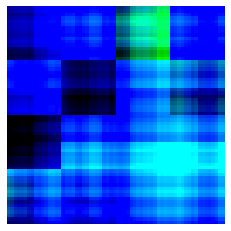

In [67]:
import matplotlib.pyplot as plt
img = img1[0].permute(1,2,0).detach()
plt.imshow(img)
plt.axis('off')

In [68]:
fake_img = torch.rand_like(img2)
discriminator(fake_img)

tensor([[[[0.6642]]]], grad_fn=<SigmoidBackward0>)

In [85]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [99]:
def get_data_loader(datasetname, root, batch_size):
  if datasetname == 'LSUN':
      dataset = torchvision.datasets.LSUN(
                    root = root,
                    classes = ['church_outdoor_train'],
                    transform = transforms.Compose([
                              transforms.Resize(64),
                              transforms.CenterCrop(64),
                              transforms.ToTensor()
                              ])
                    )
      dataloader = torch.utils.data.DataLoader(
                              dataset,
                              batch_size = batch_size,
                              num_workers = 2,
                              pin_memory = True
      )

  else:
    raise ValueError(f'No dataset named {datasetname}!')
  
  return dataloader

In [100]:
# Dataset
datasetname = 'LSUN'
# Data Root
root = 'data/'
# Parameters
batch_size = 256
# Get Dataloader
loader = get_data_loader(datasetname, root, batch_size)

In [101]:
def visualize_data(loader, n):
  m = n * n
  for i in range(1, m + 1):
    plt.subplot(n, n, i)
    data = next(iter(loader))[0][i].permute(1, 2, 0)
    print(data.shape)
    # print(discriminator(data.reshape(1, 64, 64, 3).permute(0, 3, 1, 2)))
    plt.imshow(data)

torch.Size([64, 64, 3])


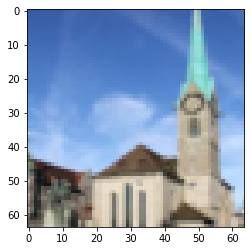

In [102]:
visualize_data(loader, 1)

In [98]:
torch.sum(img1!=img2)

tensor(12287)

In [75]:
print(img2.min())
print(img2.max())

tensor(-3.7983, grad_fn=<MinBackward1>)
tensor(2.4524, grad_fn=<MaxBackward1>)


In [76]:
t = noise

In [10]:
t

tensor([[ 1.1421e+00,  5.0329e-01, -1.5423e-01, -1.0201e+00, -5.9758e-02,
          1.2274e+00, -4.0575e-01, -6.3474e-01,  3.5831e-01,  1.0383e+00,
         -1.3535e+00, -1.1829e+00, -8.8681e-01,  2.4616e-01,  4.0922e-02,
          7.7129e-01,  1.3546e+00,  1.0218e+00,  1.6678e+00, -1.1462e-01,
         -3.0423e-02,  1.0832e+00, -1.6795e-01,  1.6680e-01, -2.9542e-01,
          1.6191e-01,  2.2318e+00, -6.1487e-01,  9.0789e-01,  1.3390e+00,
         -2.7850e-01, -1.6832e-01, -3.2627e-01, -5.6983e-01, -9.0154e-01,
         -5.8674e-01, -1.7329e+00, -8.4995e-01,  5.0130e-01,  2.8354e-01,
          1.4828e-01, -6.7260e-01, -1.0588e+00,  1.6540e+00, -9.1331e-01,
          2.9915e-01, -1.8303e-01, -5.1344e-01, -1.6071e-01, -2.0951e-01,
         -1.3850e-02, -7.2377e-01,  2.7608e-01,  3.7477e-01,  6.8620e-01,
         -1.7871e+00, -1.8791e-04,  1.2067e+00, -1.1918e+00,  1.6432e+00,
          1.6082e+00, -1.9615e+00,  1.2088e+00,  3.0224e-01]])

In [11]:
t==noise

tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True]])

In [12]:
noise

tensor([[ 1.1421e+00,  5.0329e-01, -1.5423e-01, -1.0201e+00, -5.9758e-02,
          1.2274e+00, -4.0575e-01, -6.3474e-01,  3.5831e-01,  1.0383e+00,
         -1.3535e+00, -1.1829e+00, -8.8681e-01,  2.4616e-01,  4.0922e-02,
          7.7129e-01,  1.3546e+00,  1.0218e+00,  1.6678e+00, -1.1462e-01,
         -3.0423e-02,  1.0832e+00, -1.6795e-01,  1.6680e-01, -2.9542e-01,
          1.6191e-01,  2.2318e+00, -6.1487e-01,  9.0789e-01,  1.3390e+00,
         -2.7850e-01, -1.6832e-01, -3.2627e-01, -5.6983e-01, -9.0154e-01,
         -5.8674e-01, -1.7329e+00, -8.4995e-01,  5.0130e-01,  2.8354e-01,
          1.4828e-01, -6.7260e-01, -1.0588e+00,  1.6540e+00, -9.1331e-01,
          2.9915e-01, -1.8303e-01, -5.1344e-01, -1.6071e-01, -2.0951e-01,
         -1.3850e-02, -7.2377e-01,  2.7608e-01,  3.7477e-01,  6.8620e-01,
         -1.7871e+00, -1.8791e-04,  1.2067e+00, -1.1918e+00,  1.6432e+00,
          1.6082e+00, -1.9615e+00,  1.2088e+00,  3.0224e-01]])